# Homework 2

## Pair Programming Group Number: 15
## Members of Team: Ankita Sumeet, Chloe Jin

#### Practicing using numpy to do math, and more visualizations

More fun using the numerical package, numpy, a touch of pandas, and exercising your math vocabulary. 

In [ ]:
# Your imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://gist.githubusercontent.com/yanyanzheng96/8fe13cc4b7c6a1391d4841018340a627/raw/f17479a580783a810cfe119186e63b5b28a87b4c/melb_data.csv'
df = pd.read_csv(url)
df.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## Question 1 - Discrete PDF
Create a vector of 1000 random numbers from a Normal distribution with mean 5 and standard deviation 10 and plot the discrete probability density function of that vector using a histogram.  You should use [numpy random normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to create the vector. Always label your axes and give your plots titles (this holds for all questions). 

Text(0, 0.5, 'Value')

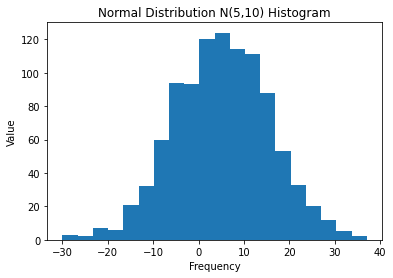

In [ ]:
#generate vector
vector = np.random.normal(5,10,1000)

#histogram
plt.hist(vector, bins = 20)
plt.title('Normal Distribution N(5,10) Histogram') 
plt.xlabel('Frequency')
plt.ylabel('Value')

## Question 2 - Discrete CDF

Create a discrete cumulative density function plot using the same vector as the last question using a line graph.
Annotate the point, $x$, where 80% of the data < $x$ and 20% of the data is greater than $x$.  You can use the matplotlib pyplot function [plot](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html) to draw the line, and to draw a star at the point $x$.  Use the [legend](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.legend.html) function to annotate the graph. 

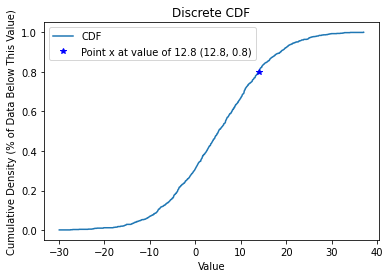

In [ ]:
#line graph
counter, num_bins = np.histogram(vector, bins=1000)
PDF = counter / sum(counter)
CDF = np.cumsum(PDF)

tup = list(zip(num_bins[1:], CDF))
df_CDF = pd.DataFrame(tup, columns=['Number', 'CDF'])

ft_1, = plt.plot(df_CDF['Number'], df_CDF['CDF'])

plt.title('Discrete CDF')
plt.xlabel('Value')
plt.ylabel('Cumulative Density (% of Data Below This Value)')

#annotate point x
df_above = df_CDF.loc[df_CDF['CDF'] > 0.799]
point_x = df_above['Number'].iloc[0] #point X is at 12.8

ft_2, = plt.plot(point_x, 0.8, 'b*')

plt.legend([ft_1, ft_2],["CDF", "Point x at value of 12.8 (12.8, 0.8)"])

#80% of numbers are smaller than 12.8 and 20% of numbers are greater than 12.8

## Question 3 - Univariate Analysis

Load in the data from melb_data.csv into a pandas DataFrame.  Create a box and whisker graph comparing the prices in the suburbs:
  - Reservoir         
  - Richmond          
  - Bentleigh East
  
You should use the [boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) function, with the parameter `by`. 

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


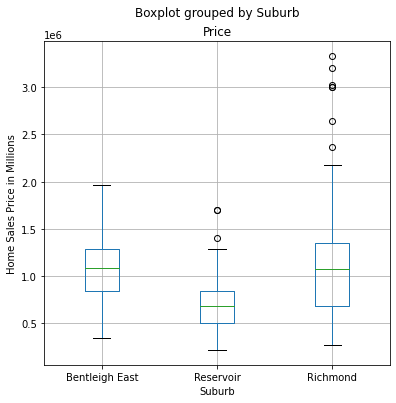

In [ ]:
#read in data
df_cities = df[df['Suburb'].isin(['Reservoir', 'Richmond', 'Bentleigh East'])]

#boxplot
box = df_cities.boxplot('Price', by = 'Suburb', figsize = (6,6)).set_ylabel('Home Sales Price in Millions')

## Question 4 - Rotation with Matrices

Consider the vectors:
  - $\alpha$ which begins at (0,0) and ends at (1,1)
  - $\beta$ which begins at (1,1) and ends at (0,1)
  
Draw $\alpha$ and $\beta$ using a line graph using a different color for each vector.

Now, using matrix multiplication rotate the vectors 45 degrees (clockwise or counter-clockwise, you choose!) and draw the result.  You must use numpy's [matmul](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html) to accomplish the rotation. Numpy also has functions for `sin` and `cos`.  You should also get [pi](https://numpy.org/doc/stable/reference/constants.html?highlight=pi#numpy.pi) from the numpy package. 

Text(0, 0.5, 'Y-Axis')

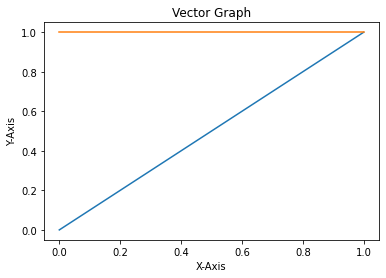

In [ ]:
#line graph
ax = [0,1]
ay = [0,1]
plt.plot(ax,ay)
bx = [1,0]
by = [1,1]
plt.plot(bx,by)
plt.title('Vector Graph')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')

Text(0, 0.5, 'Y-Axis')

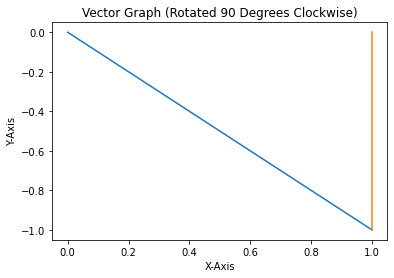

In [ ]:
#ninety degree rotation clockwise
rotate = [[np.cos(np.pi/2),-np.sin(np.pi/2)],[np.sin(np.pi/2), np.cos(np.pi/2)]]
#rotate = [[0,-1],[1, 0]]

#line A rotation
point_a1 = [0,0]
point_a2 = [1,1]

a1_r = np.matmul(point_a1, rotate)
a2_r = np.matmul(point_a2, rotate)
x_of_a = (a1_r[0], a2_r[0])
y_of_a = (a1_r[1], a2_r[1])

plt.plot(x_of_a,y_of_a)

#line B rotation
point_b1 = [1,1]
point_b2 = [0,1]

b1_r = np.matmul(point_b1, rotate)
b2_r = np.matmul(point_b2, rotate)
x_of_b = (b1_r[0], b2_r[0])
y_of_b = (b1_r[1], b2_r[1])

#plot rotated graph
plt.plot(x_of_b,y_of_b)
plt.title('Vector Graph (Rotated 90 Degrees Clockwise)')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')

## Question 5 - Solving Systems of Equations with Matrices

Consider the following system of equations:
  - $2x +  y + z = 5$
  - $4x - 6y     = -2$
  - $-2x + 7y + 2z = 9$
  
Convert the coefficients of the system of equations to a matrix, $A$, where the first column contains the $x$ coefficients, the second column contains the $y$ coefficients, and the third column contains the $z$ coefficients. 
Covert the values on the right hand side to a (3,1) vector, $b$, (make sure you keep all the numbers in order.  Now, solve for $(x,y,z)$ by inverting $A$ and multiplying by $b$, eg, $A^{-1} * b$. 

Use the numpy [linear algebra inverse function](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) to find $A^{-1}$.

In [ ]:
A = np.array([[2,1,1],[4,-6,0],[-2,7,2]])
B = np.array([[5],[-2],[9]])
Inv_A = np.linalg.inv(A)
np.matmul(Inv_A, B)

array([[1.],
       [1.],
       [2.]])